# FINAL PROJECT 2 
# Prediksi Cuaca Harian di Australia
Anggota Kelompok 8:
- Rijal Muhammad Farizky
- Diva Nabila

## Project Overview
### Latar Belakang
`Cuaca` menjadi faktor penting yang dapat mempengaruhi kehidupan sehari-hari di berbagai sektor ekonomi, termasuk pertanian, pariwisata, dan manajemen bencana. Di Australia, cuaca yang ekstrem seperti kekeringan dan banjir dapat memiliki dampak yang signifikan pada kehidupan dan ekonomi masyarakat. Oleh karena itu, pengembangan sistem prediksi cuaca yang akurat berdasarkan data historis adalah suatu kebutuhan mendesak.

Dataset `Rain in Australia` berisi pengamatan cuaca harian selama sekitar 10 tahun dari berbagai stasiun cuaca di Australia. Dengan dataset ini kita dapat melakukan eksplorasi dan membangun model machine learning untuk prediksi cuaca dengan baik.

### Tujuan
1. `Exploratory Data Analysis` : Melakukan eksplorasi data yang mendalam untuk memahami pola cuaca di Australia selama 10 tahun terakhir, mengidentifikasi tren, variabilitas musiman, dan hubungan antar variabel cuaca.

2. `Prediksi Cuaca Harian`: Mengembangkan model prediksi cuaca harian menggunakan dua pendekatan: `Logistic Regression` dan `Support Vector Machine (SVM)`.

3. `Evaluasi Model`: Mengukur kinerja model menggunakan metrik evaluasi seperti akurasi, presisi, recall, dan F1-score. Melakukan perbandingan antara model Logistic Regression dan SVM untuk menentukan model mana yang memberikan prediksi terbaik.

4. `Implementasi dan Pengujian`: Melakukan deployment model Logistic Regression dan Support Vector Machine (SVM) ke dalam sistem yang dapat memberikan prediksi cuaca harian secara real-time berdasarkan data cuaca terbaru.

## Pustaka yang Digunakan

In [84]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pickle

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## Data Loading
**Load Dataset**

In [2]:
df_wth = pd.read_csv('../dataset/weatherAUS.csv')

**Row and Column of Dataset**

In [3]:
df_wth.shape

(145460, 23)

**The Data**

In [4]:
df_wth

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


**Informasi detail mengenai dataset**

In [5]:
df_wth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Berdasarkan informasi di atas, diketahui bahwa data terdiri dari `145460 baris` dan `23 kolom`. Data tersebut masih terdapat missing value terlihat dari 23 kolom, hanya 2 kolom yang berisi data tidak null, yakni kolom Date dan Location. Maka dari itu, diperlukan pembersihan data.

## Data Cleaning

### Examine Duplicated Values

In [6]:
df_wth.duplicated().sum()

0

### Examining Missing Values

In [7]:
df_wth.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
df_wth.drop("Date", axis=1, inplace=True)

### Filling Missing Values
Filling Numerical Columns With Median

In [9]:
numerical = [col for col in df_wth.columns if df_wth[col].dtype!='O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [10]:
df_wth.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [11]:
df_wth[numerical] = df_wth[numerical].fillna(df_wth[numerical].median())
df_wth.isna().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

### Drop the missing value in Categorical Columns

In [12]:
df_wth.dropna(subset=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'], axis=0, inplace=True)
df_wth.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
df_wth.shape

(123710, 22)

Setalah dilakukan penghapusan missing values pada categorical value, baris data yang semula `145460` berkurang menjadi `123710` baris.

### Check Outliers

In [14]:
print(round(df_wth[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  123710.0  123710.0  123710.0     123710.0  123710.0       123710.0   
mean       12.0      23.0       2.0          5.0       8.0           41.0   
std         6.0       7.0       9.0          3.0       3.0           13.0   
min        -8.0      -5.0       0.0          0.0       0.0            7.0   
25%         8.0      18.0       0.0          4.0       8.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      29.0       1.0          6.0       9.0           48.0   
max        34.0      48.0     368.0         86.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      123710.0      123710.0     123710.0     123710.0     123710.0   
mean           15.0          19.0         68.0         51.0       1017.0   
std             8.0           9.0         19.0         21.0          7.0   
mi

Berdasarkan data di atas, terlihat jika Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, dan WindSpeed3pm memiliki jumlah outliers yang lebih banyak jika dibandingkan dengan kolom lain.

Text(0, 0.5, 'WindSpeed3pm')

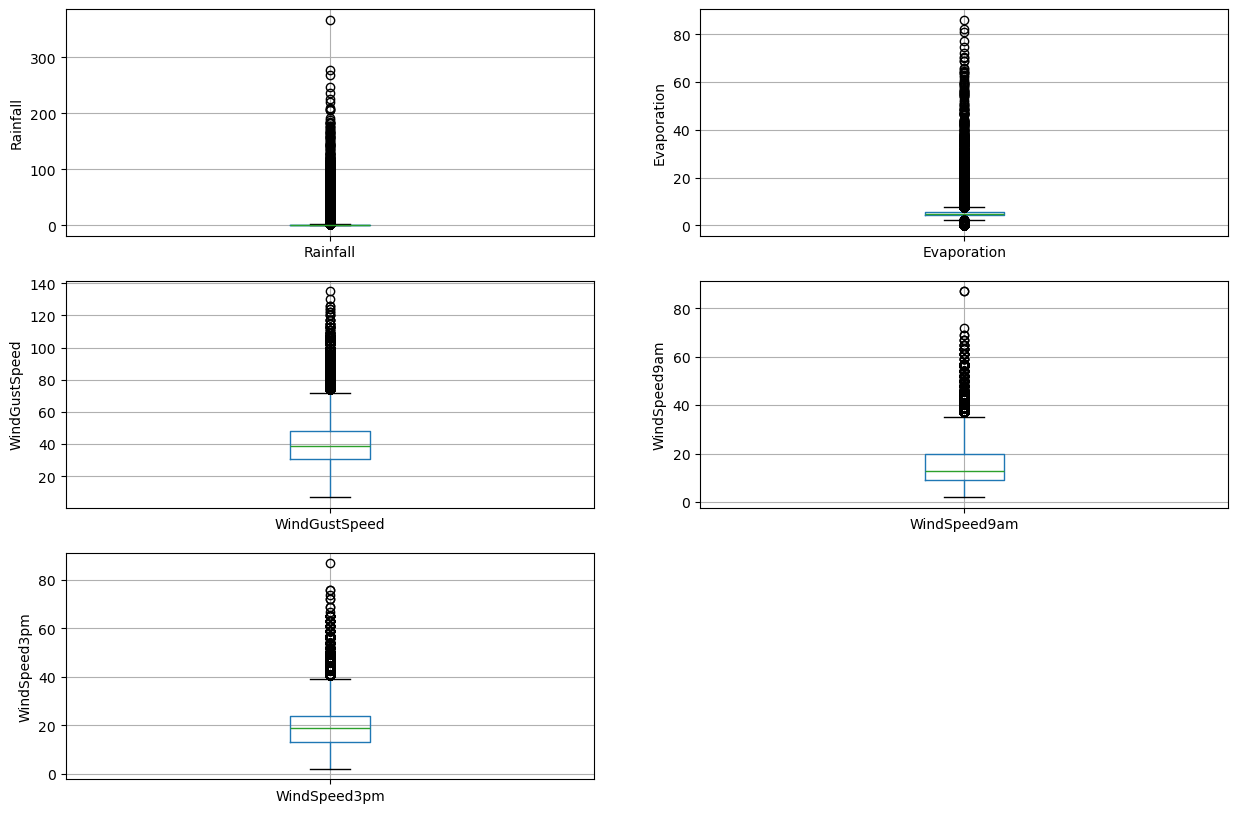

In [15]:
# Membuat box plots untuk memvisualisasikan outliers

plt.figure(figsize=(15,10))


plt.subplot(3, 2, 1)
fig = df_wth.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(3, 2, 2)
fig = df_wth.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(3, 2, 3)
fig = df_wth.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')


plt.subplot(3, 2, 4)
fig = df_wth.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(3, 2, 5)
fig = df_wth.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

### Check Outliers

Mengecek apakah variabel Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, dan WindSpeed3pm berdistribusi normal atau skewed dengan menggunakan plot histogram.

Text(0, 0.5, 'RainTomorrow')

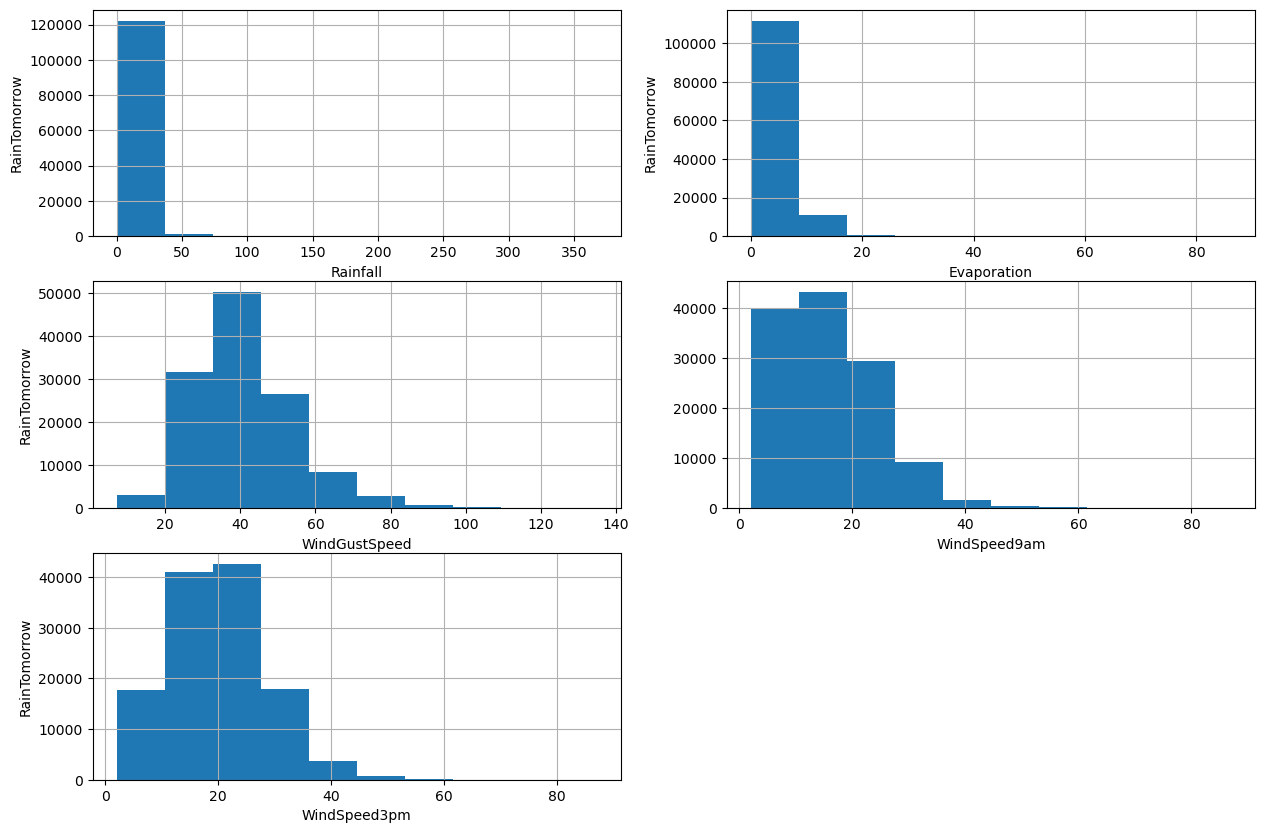

In [16]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(3, 2, 1)
fig = df_wth.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(3, 2, 2)
fig = df_wth.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(3, 2, 3)
fig = df_wth.WindGustSpeed.hist(bins=10)
fig.set_xlabel('WindGustSpeed')
fig.set_ylabel('RainTomorrow')


plt.subplot(3, 2, 4)
fig = df_wth.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')

plt.subplot(3, 2, 5)
fig = df_wth.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

Berdasarkan plot histagram di atas, terlihat jika semua variabel berdistribusi skewed. Sehingga digunakan interquantile range untuk mencari outliers.|

In [17]:
Q1 = (df_wth[['Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']]).quantile(0.25)
Q3 = (df_wth[['Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']]).quantile(0.75)

IQR= Q3-Q1

In [18]:
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

In [19]:
print('Nilai Maximum:\n', maximum)

Nilai Maximum:
 Rainfall          2.0
Evaporation       7.7
WindGustSpeed    73.5
WindSpeed9am     36.5
WindSpeed3pm     40.5
dtype: float64


In [20]:
print('Nilai Minimum :\n', minimum)

Nilai Minimum :
 Rainfall        -1.2
Evaporation      2.1
WindGustSpeed    5.5
WindSpeed9am    -7.5
WindSpeed3pm    -3.5
dtype: float64


In [21]:
# Align DataFrames along axis=1
df_wth, maximum = df_wth.align(maximum, axis=1, copy=False)
df_wth, minimum = df_wth.align(minimum, axis=1, copy=False)

# Create boolean masks
more_than = (df_wth > maximum)
lower_than = (df_wth < minimum)

# Perform masking
df_wth = df_wth.mask(more_than, maximum,  axis=1)
df_wth = df_wth.mask(lower_than, minimum,  axis=1)

In [22]:
print('\nPersebaran data setelah ditangani Outlier: ')
print(df_wth[['Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']].describe())


Persebaran data setelah ditangani Outlier: 
            Rainfall   Evaporation  WindGustSpeed   WindSpeed9am  \
count  123710.000000  123710.00000  123710.000000  123710.000000   
mean        0.486650       4.89197      40.482237      14.915330   
std         0.793145       1.66876      12.746265       7.985716   
min         0.000000       2.10000       7.000000       2.000000   
25%         0.000000       4.20000      31.000000       9.000000   
50%         0.000000       4.80000      39.000000      13.000000   
75%         0.800000       5.60000      48.000000      20.000000   
max         2.000000       7.70000      73.500000      36.500000   

        WindSpeed3pm  
count  123710.000000  
mean       19.085991  
std         8.292947  
min         2.000000  
25%        13.000000  
50%        19.000000  
75%        24.000000  
max        40.500000  


Text(0, 0.5, 'WindSpeed3pm')

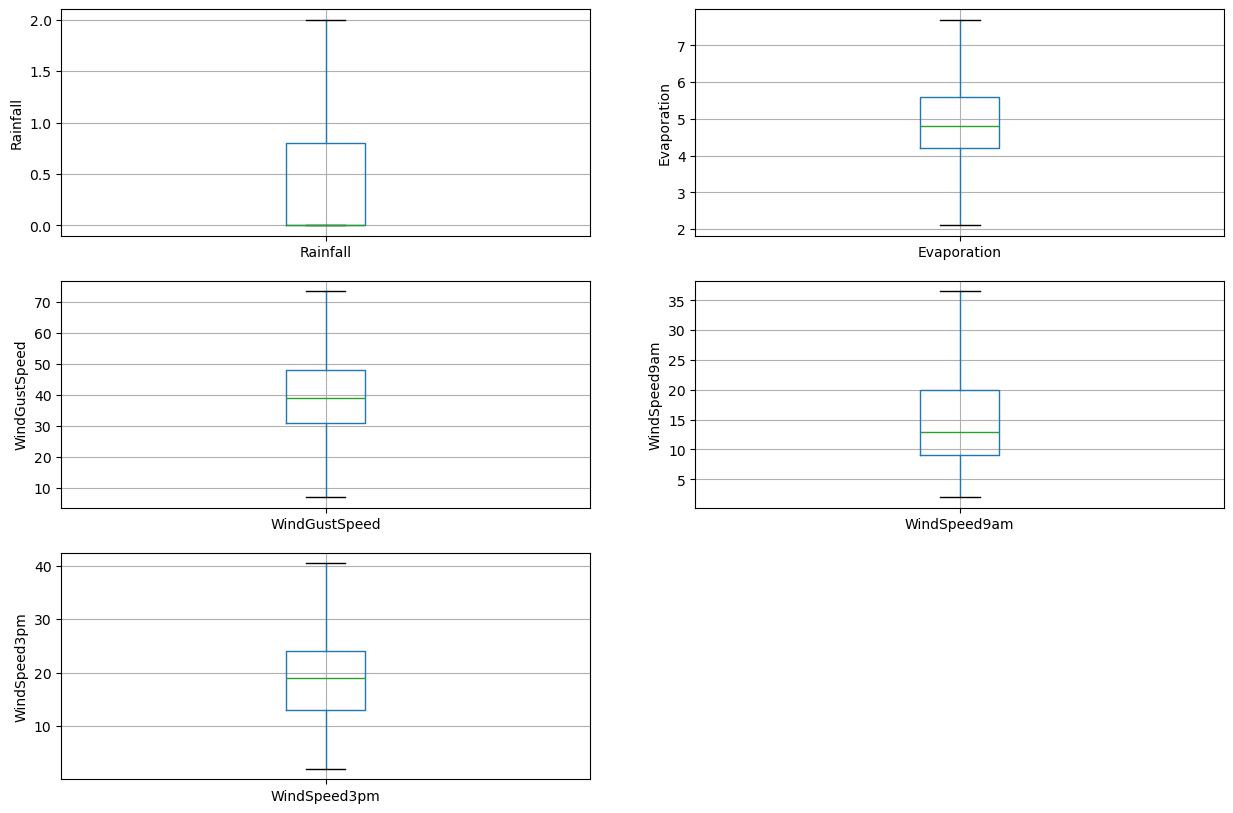

In [23]:
# Membuat box plots untuk memvisualisasikan outliers

plt.figure(figsize=(15,10))


plt.subplot(3, 2, 1)
fig = df_wth.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(3, 2, 2)
fig = df_wth.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(3, 2, 3)
fig = df_wth.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')


plt.subplot(3, 2, 4)
fig = df_wth.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(3, 2, 5)
fig = df_wth.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [24]:
df_wth.shape

(123710, 22)

## Exploratory Data Analysis (EDA)

In [25]:
df_wth['RainTomorrow'] = df_wth['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_wth['RainToday'] = df_wth['RainToday'].map({'Yes': 1, 'No': 0})

In [26]:
df_wth['RainToday'].unique()

array([0, 1])

Karena tujuan kita adalah memprediksi apakah besok terjadi hujan atau tidak (RainTomorrow) maka perlu dilakukan analisis terhadap :

1. Kemungkinan hari esok terjadi hujan atau tidak (RainTomorrow)
2. Pengaruh data numerik (numerical values) terhadap RainTomorrow
3. Pengaruh data kategori (categorical values) terhadap RainTomorrow

### Measure of Central Tendency

In [27]:
df_wth['RainTomorrow'].mode()

0    0
Name: RainTomorrow, dtype: int64

Berdasarkan output di atas dapat diketahui bahwa sebagian besar prediksi hujan untuk hari esok adalah No atau tidak terjadi hujan.

In [28]:
std_rt = df_wth['RainTomorrow'].std(ddof=1)
print("Deviasi standar untuk RainTomorrow : ", std_rt)

Deviasi standar untuk RainTomorrow :  0.41520497436447024


In [29]:
df_wth['RainTomorrow'].skew()

1.3419080002397141

### Measure of Correlation Location and Sum of Predict

In [30]:
df_loc = df_wth.groupby(by='Location').sum()
df_loc = df_loc[['RainTomorrow']]
df_loc = df_loc.sort_values(by="RainTomorrow",ascending=True)
df_loc

,RainTomorrow
Location,
Uluru,110
Woomera,193
AliceSprings,228
Nhil,236
Katherine,238
Mildura,315
Moree,336
Cobar,377
PearceRAAF,401


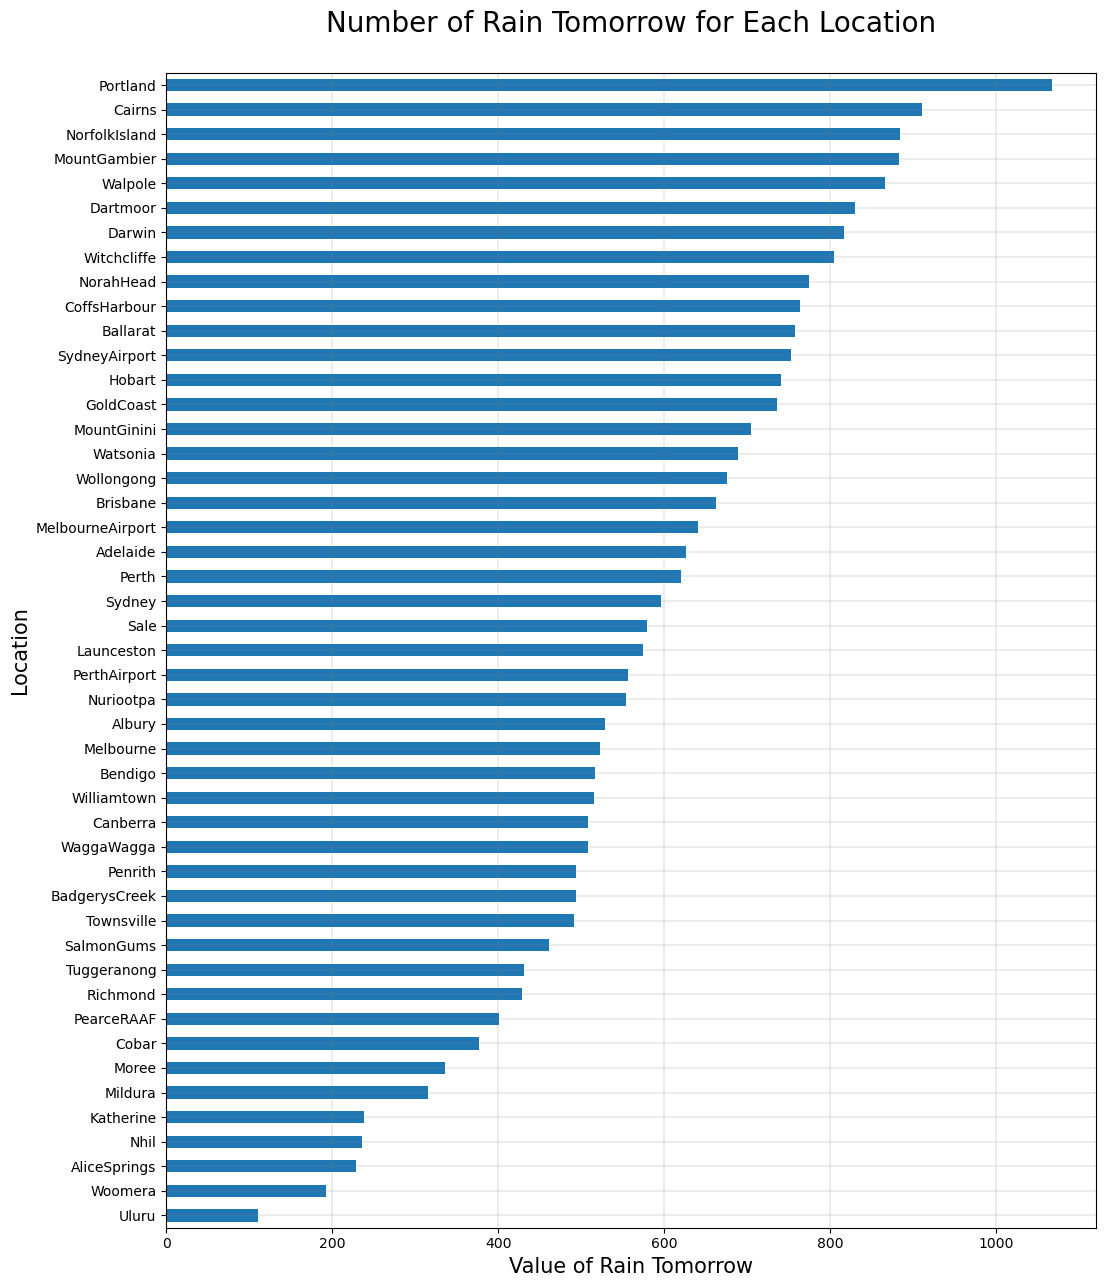

In [87]:
df_loc.plot(kind="barh",
               figsize=(12,15),
               legend=False,
               
               
                )
plt.title("Number of Rain Tomorrow for Each Location\n", fontsize=20)
plt.xlabel("Value of Rain Tomorrow", fontsize=15)
plt.ylabel("Location", fontsize=15)
plt.grid(color="grey", linewidth=0.2)
plt.show()

Berdasarkan barplot dan informasi di atas, diketahui bahwa daerah Portland memiliki jumlah rata-rata prediksi terjadinya hujan pada hari esok lebih tinggi dibandingkan daerah lainnya.

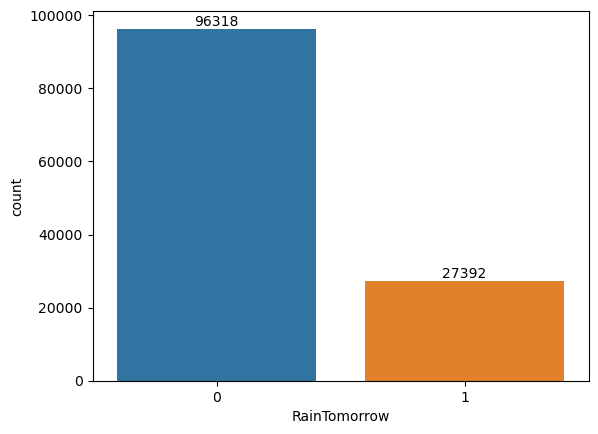

In [32]:
ax = sns.countplot(x=df_wth['RainTomorrow'])
for i in ax.containers:
    ax.bar_label(i,)

Terlihat bahwa jumlah `No` pada kolom RainTomorrow adalah sebanyak `96318` data, sedangkan untuk jumlah `Yes` adalah `27392`. Tahap selanjutnya, kita kan melihat Count Plot pada kolom RainTomorrow pad tiap daerah di Australia.

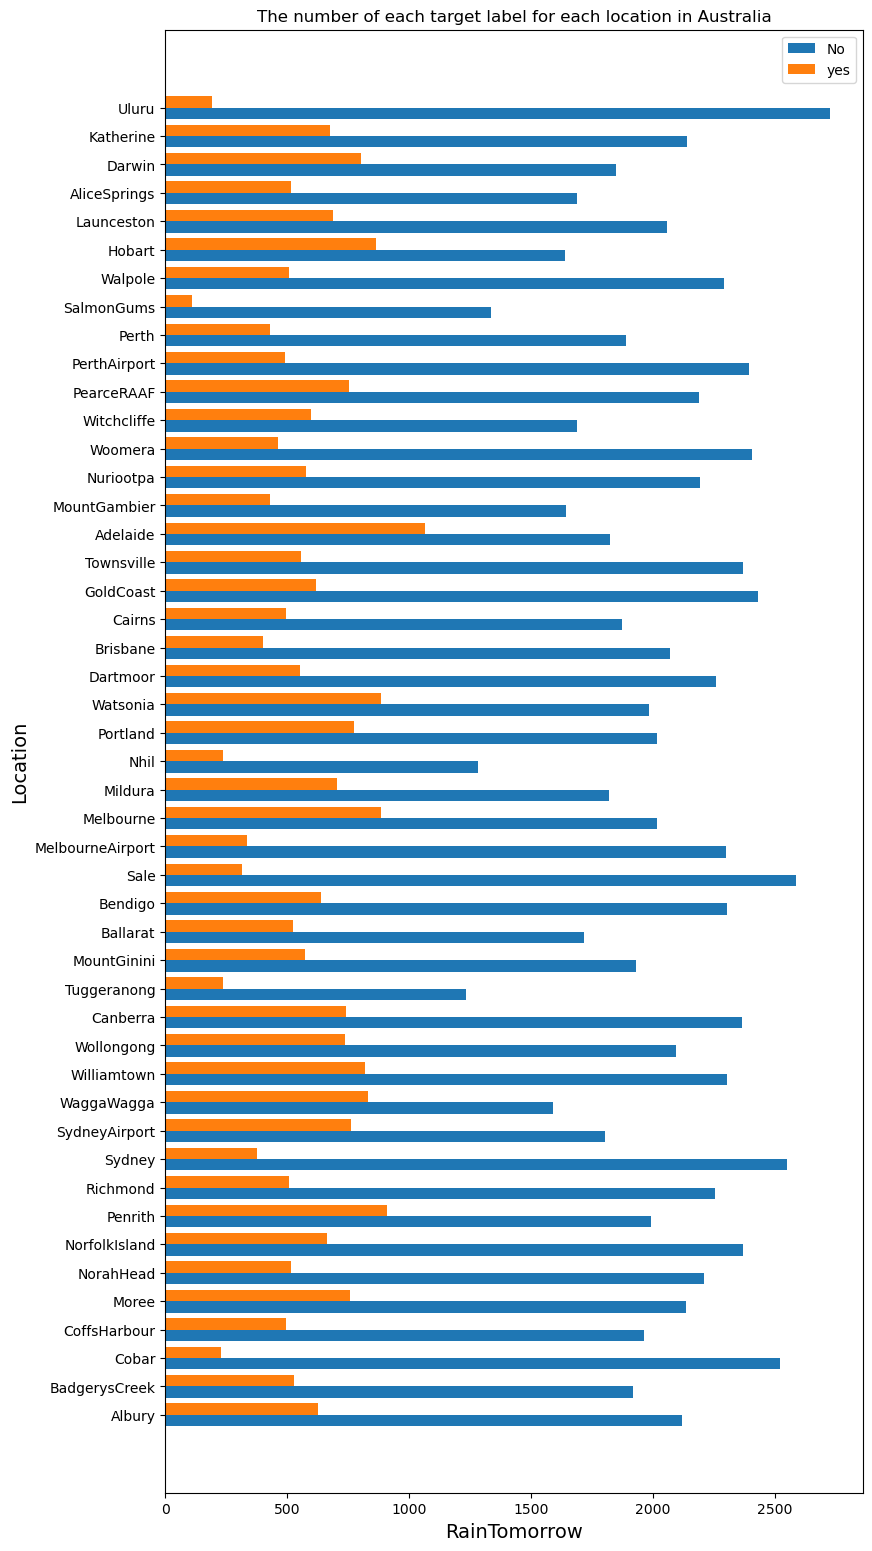

In [33]:
# Target 'No' berdasarkan kota
no = df_wth[(df_wth['RainTomorrow']==0)].groupby('Location').count()['RainTomorrow'].values

# Target 'Yes' berdasarkan kota
yes = df_wth[(df_wth['RainTomorrow']==1)].groupby('Location').count()['RainTomorrow'].values

# Visualisasi
sumbu_y_ticks = list(df_wth['Location'].unique())
sumbu_y_axis = np.arange(0,len(sumbu_y_ticks),1)

plt.figure(figsize=(9,19))
plt.barh(sumbu_y_axis-0.2, no,0.4,label='No')
plt.barh(sumbu_y_axis + 0.2, yes, 0.4, label = 'yes')
plt.yticks(sumbu_y_axis,sumbu_y_ticks, )
plt.ylabel("Location", fontsize=14)
plt.xlabel("RainTomorrow", fontsize=14)
plt.title("The number of each target label for each location in Australia")
plt.legend()
plt.show()

### Correlation of RainTomorrow with All Attributes

In [34]:
encode = LabelEncoder()
df_wth.WindGustDir = encode.fit_transform(df_wth.WindGustDir)
df_wth.WindDir9am = encode.fit_transform(df_wth.WindDir9am)
df_wth.WindDir3pm = encode.fit_transform(df_wth.WindDir3pm)

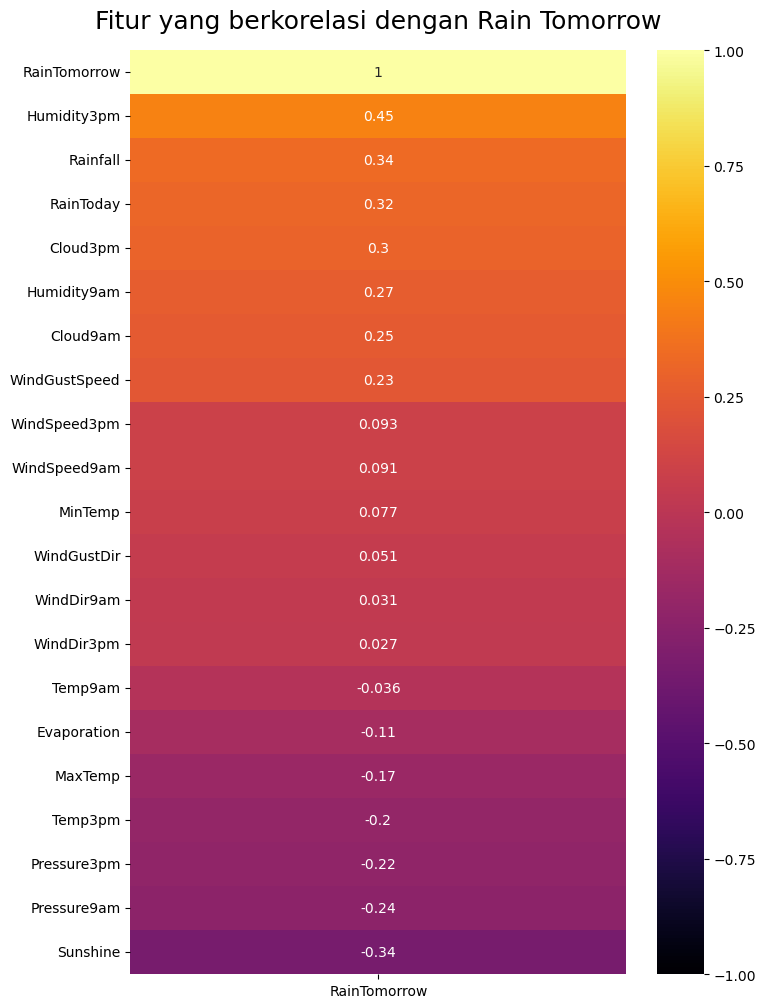

In [ ]:
plt.figure(figsize=(8, 12))
hm1 = sns.heatmap(df_loc_in.corr()[['RainTomorrow']].sort_values(by='RainTomorrow', ascending=False), vmin=-1, vmax=1, annot=True, cmap='inferno')
hm1.set_title('Fitur yang berkorelasi dengan Rain Tomorrow', fontdict={'fontsize':18}, pad=16);

Dapat dilihat bahwa fitur yang paling berkorelasi dengan kolom 'RainTomorrow' adalah Humidity3pm, Rainfall, RainToday, Cloud3pm, Humidity9am, dan Cloud9am. Sedangkan, fitur dengan korelasi terendah yakni MinTemp, WindGustDir, WindDir9am, WindDir3pm, dan Temp9am.

## Data Preprocessing

In [36]:
df_wth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123710 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Cloud3pm       123710 non-null  float64
 1   Cloud9am       123710 non-null  float64
 2   Evaporation    123710 non-null  float64
 3   Humidity3pm    123710 non-null  float64
 4   Humidity9am    123710 non-null  float64
 5   Location       123710 non-null  object 
 6   MaxTemp        123710 non-null  float64
 7   MinTemp        123710 non-null  float64
 8   Pressure3pm    123710 non-null  float64
 9   Pressure9am    123710 non-null  float64
 10  RainToday      123710 non-null  int64  
 11  RainTomorrow   123710 non-null  int64  
 12  Rainfall       123710 non-null  float64
 13  Sunshine       123710 non-null  float64
 14  Temp3pm        123710 non-null  float64
 15  Temp9am        123710 non-null  float64
 16  WindDir3pm     123710 non-null  int64  
 17  WindDir9am     123710 non-null  in

In [39]:
df_wth.Location = encode.fit_transform(df_wth.Location)

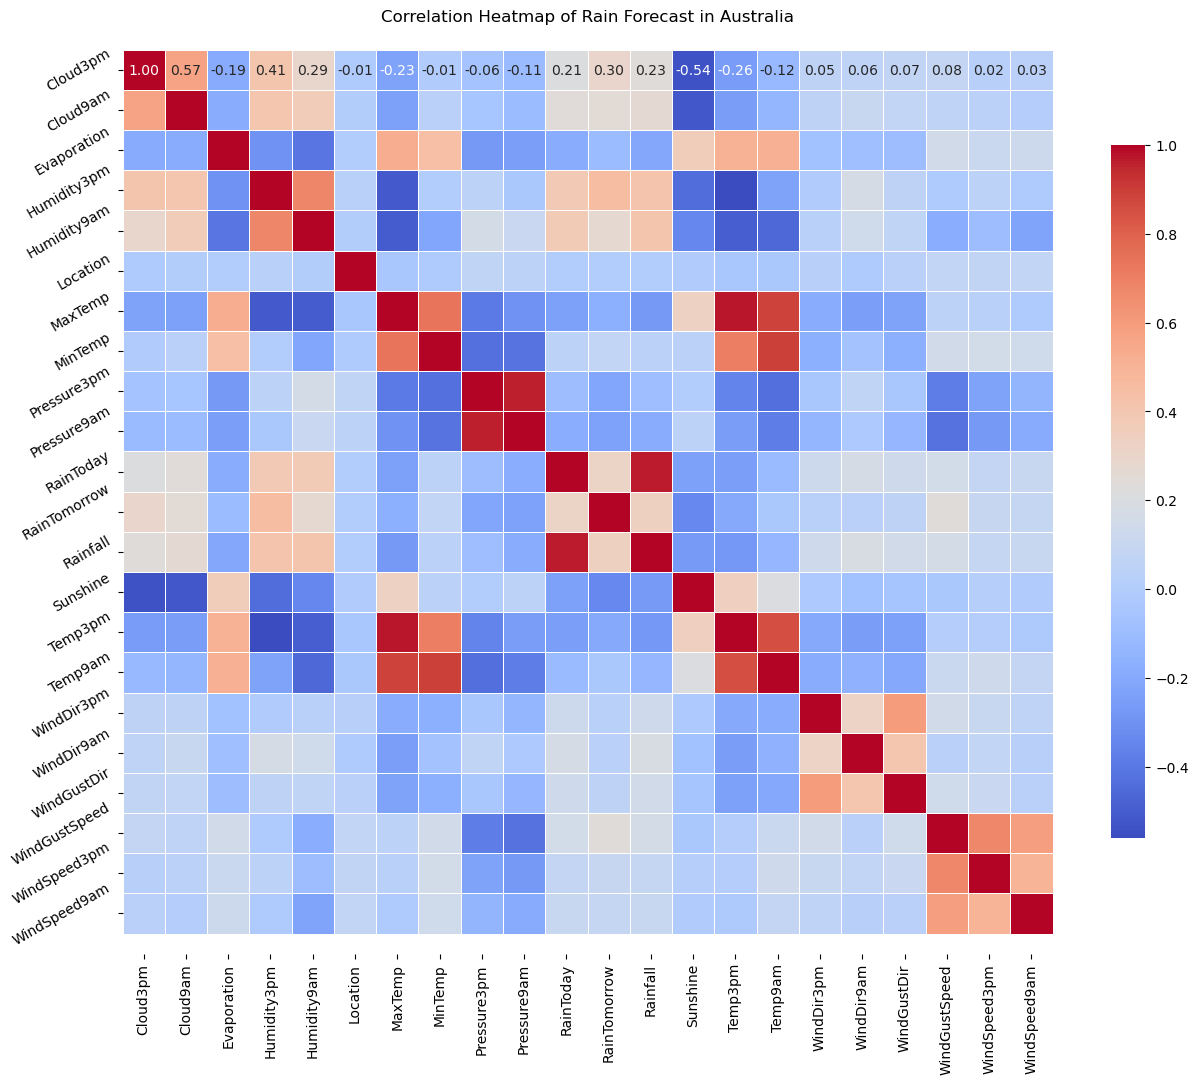

In [47]:
correlation = df_wth.corr()
# Set up the matplotlib figure
plt.figure(figsize=(15, 12))
plt.title('Correlation Heatmap of Rain Forecast in Australia')

# Create a heatmap with values displayed
ax = sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5, cbar_kws={'shrink': 0.75})

# Rotate the x and y axis labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)

# Ensure the colorbar doesn't overlap with the heatmap values
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

# Show the plot
plt.show()

Berdasarkan Heatmap terlihat bahwa MaxTemp dan Temp3pm serta Pressure9am dan Pressure3pm memiliki korelasi yang tinggi yaitu secara berturut-turut sebesar 0,98 dan 0,96. Oleh karena itu, salah satu dari dua kolom yang multikolinearitas harus dihapus

In [49]:
df_wth.drop(['Temp3pm','Pressure3pm'], axis=1, inplace=True)

In [50]:
df_wth.reset_index(drop=True, inplace=True)

In [52]:
df_wth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Cloud3pm       123710 non-null  float64
 1   Cloud9am       123710 non-null  float64
 2   Evaporation    123710 non-null  float64
 3   Humidity3pm    123710 non-null  float64
 4   Humidity9am    123710 non-null  float64
 5   Location       123710 non-null  int64  
 6   MaxTemp        123710 non-null  float64
 7   MinTemp        123710 non-null  float64
 8   Pressure9am    123710 non-null  float64
 9   RainToday      123710 non-null  int64  
 10  RainTomorrow   123710 non-null  int64  
 11  Rainfall       123710 non-null  float64
 12  Sunshine       123710 non-null  float64
 13  Temp9am        123710 non-null  float64
 14  WindDir3pm     123710 non-null  int64  
 15  WindDir9am     123710 non-null  int64  
 16  WindGustDir    123710 non-null  int64  
 17  WindGustSpeed  123710 non-nul

# Logistic Regression

### Feature Selection

In [45]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [70]:
X = df_wth.drop(["RainTomorrow"], axis=1)
Y = df_wth['RainTomorrow']

In [71]:
sfs = SFS(LogisticRegression(),
          n_features_to_select=10)

In [72]:
sfs.fit(x_transform, Y)
sfs.get_feature_names_out()

array(['Humidity3pm', 'MaxTemp', 'Pressure9am', 'RainToday', 'Rainfall',
       'Sunshine', 'WindDir9am', 'WindGustSpeed', 'WindSpeed3pm',
       'WindSpeed9am'], dtype=object)

In [73]:
X_fit=df_wth[['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'RainToday']]

### Splitting Dataset

In [74]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.25)

## Pendefinisan Model

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [76]:
logreg = LogisticRegression(C=0.8, class_weight='balanced', solver='liblinear', random_state=0)

svm = svm.SVC(class_weight='balanced', kernel='linear')

In [77]:
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

In [78]:
# SVM
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

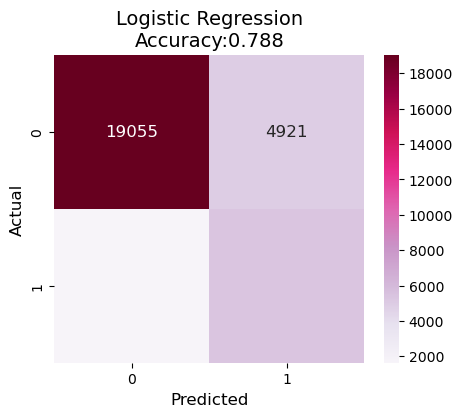

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     23976
           1       0.52      0.76      0.62      6952

    accuracy                           0.79     30928
   macro avg       0.72      0.78      0.74     30928
weighted avg       0.83      0.79      0.80     30928

Accuracy Score: 0.7879591308846353
Precision Score: 0.5192457991402891
Recall Score: 0.7645281933256617
F1 Score: 0.6184547358622294


In [85]:
# Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision Score: {precision_score(y_test,y_pred_lr)}')
print(f'Recall Score: {recall_score(y_test,y_pred_lr)}')
print("F1 Score:",f1_score(y_test,y_pred_lr))

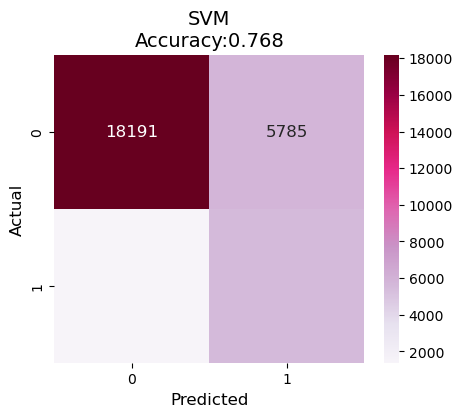

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.84     23976
           1       0.49      0.80      0.61      6952

    accuracy                           0.77     30928
   macro avg       0.71      0.78      0.72     30928
weighted avg       0.83      0.77      0.78     30928

Accuracy Score: 0.7682682359027418
Precision Score: 0.4905328049317481
Recall Score: 0.8012082853855006
F1 Score: 0.6085104058556835


In [86]:
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("SVM\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision Score: {precision_score(y_test,y_pred_svm)}')
print(f'Recall Score: {recall_score(y_test,y_pred_svm)}')
print("F1 Score:",f1_score(y_test,y_pred_svm))